In [1]:
import pandas as pd
import numpy as np

# Mengatur opsi display Pandas agar semua kolom terlihat
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [3]:
# --- LANGKAH 1: MEMBUAT MATRIKS KEPUTUSAN (X) ---.

alternatif = [
    'ESP32-WROOM-32', 'NodeMCU ESP8266', 'Arduino Uno R3', 'Raspberry Pi Pico W', 
    'STM32 Nucleo-64', 'Teensy 4.1', 'Seeed Studio XIAO ESP32C3', 'Nordic nRF52840 DK',
    'Particle Argon', 'Adafruit Feather HUZZAH32', 'AVR ATmega328P (Chip)', 'PIC18F45K22 (Chip)'
]

data = {
    # A. Spesifikasi Teknis Inti
    'Kecepatan Clock (MHz)': [240, 80, 16, 133, 84, 600, 160, 64, 64, 240, 20, 64],
    'Kapasitas RAM (KB)': [520, 80, 2, 264, 128, 1024, 400, 256, 128, 520, 2, 3.8],
    'Kapasitas Flash Memory (KB)': [4000, 4000, 32, 2000, 512, 8000, 4000, 1024, 512, 4000, 32, 64],
    'Arsitektur CPU (bit)': [32, 32, 8, 32, 32, 32, 32, 32, 32, 32, 8, 8],
    'Jumlah Pin GPIO': [34, 17, 20, 30, 51, 40, 11, 48, 20, 21, 23, 36],
    'Resolusi ADC (bit)': [12, 10, 10, 12, 12, 10, 12, 12, 12, 12, 10, 10],
    'Ketersediaan FPU': [1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
    'Jumlah Antarmuka UART': [3, 2, 1, 2, 4, 8, 2, 2, 2, 3, 1, 2],
    'Jumlah Antarmuka I2C': [2, 1, 1, 2, 2, 4, 1, 2, 3, 2, 1, 2],
    'Jumlah Antarmuka SPI': [4, 2, 1, 2, 3, 3, 1, 3, 2, 2, 1, 2],
    # B. Konektivitas
    'Ketersediaan Wi-Fi (built-in)': [1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0],
    'Ketersediaan Bluetooth/BLE': [1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0],
    'Dukungan Ethernet': [1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
    'Dukungan Protokol IoT (MQTT)': [5, 4, 2, 4, 3, 3, 4, 4, 5, 5, 2, 1],
    # C. Manajemen Daya
    'Konsumsi Daya Aktif (mA)': [95, 70, 45, 90, 50, 100, 80, 15, 80, 95, 20, 25],
    'Konsumsi Daya Deep Sleep (µA)': [10, 20, 50, 180, 10, 130, 5, 2, 80, 15, 30, 1],
    'Tegangan Operasi (Volt)': [3.3, 3.3, 5, 3.3, 3.3, 3.3, 3.3, 3.3, 3.3, 3.3, 5, 5],
    # D. Biaya dan Ketersediaan
    'Harga per Unit (Rupiah)': [85000, 45000, 120000, 110000, 220000, 450000, 70000, 600000, 550000, 250000, 25000, 35000],
    'Harga per 1000 Unit (Rupiah)': [55000, 28000, 90000, 80000, 150000, 380000, 45000, 450000, 400000, 180000, 15000, 22000],
    'Ketersediaan di Pemasok Lokal': [5, 5, 5, 4, 3, 2, 4, 1, 1, 3, 5, 4],
    'Waktu Tunggu (Lead Time)': [1, 1, 1, 2, 4, 6, 2, 8, 8, 4, 1, 2],
    # E. Ekosistem dan Dukungan
    'Dukungan Arduino IDE': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    'Dukungan PlatformIO': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    'Kualitas Dokumentasi Resmi': [4, 3, 5, 5, 4, 4, 4, 5, 5, 5, 3, 3],
    'Ukuran Komunitas Online': [5, 5, 5, 4, 4, 4, 3, 4, 3, 5, 5, 3],
    'Jumlah Library Tersedia': [5, 4, 5, 4, 4, 4, 3, 4, 5, 5, 5, 2],
    'Kemudahan Penggunaan': [4, 4, 5, 4, 3, 3, 4, 3, 5, 5, 5, 2],
    'Ukuran Fisik/Form Factor (mm²)': [1250, 1500, 3672, 1224, 4684, 2520, 385, 8000, 2032, 1150, 200, 300],
    'Toleransi Suhu Operasional (°C)': [85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 125],
    'Fitur Keamanan Hardware': [1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0]
}

df = pd.DataFrame(data, index=alternatif)
df

,Kecepatan Clock (MHz),Kapasitas RAM (KB),Kapasitas Flash Memory (KB),Arsitektur CPU (bit),Jumlah Pin GPIO,Resolusi ADC (bit),Ketersediaan FPU,Jumlah Antarmuka UART,Jumlah Antarmuka I2C,Jumlah Antarmuka SPI,Ketersediaan Wi-Fi (built-in),Ketersediaan Bluetooth/BLE,Dukungan Ethernet,Dukungan Protokol IoT (MQTT),Konsumsi Daya Aktif (mA),Konsumsi Daya Deep Sleep (µA),Tegangan Operasi (Volt),Harga per Unit (Rupiah),Harga per 1000 Unit (Rupiah),Ketersediaan di Pemasok Lokal,Waktu Tunggu (Lead Time),Dukungan Arduino IDE,Dukungan PlatformIO,Kualitas Dokumentasi Resmi,Ukuran Komunitas Online,Jumlah Library Tersedia,Kemudahan Penggunaan,Ukuran Fisik/Form Factor (mm²),Toleransi Suhu Operasional (°C),Fitur Keamanan Hardware
ESP32-WROOM-32,240,520.0,4000,32,34,12,1,3,2,4,1,1,1,5,95,10,3.3,85000,55000,5,1,1,1,4,5,5,4,1250,85,1
NodeMCU ESP8266,80,80.0,4000,32,17,10,0,2,1,2,1,0,0,4,70,20,3.3,45000,28000,5,1,1,1,3,5,4,4,1500,85,0
Arduino Uno R3,16,2.0,32,8,20,10,0,1,1,1,0,0,0,2,45,50,5.0,120000,90000,5,1,1,1,5,5,5,5,3672,85,0
Raspberry Pi Pico W,133,264.0,2000,32,30,12,1,2,2,2,1,1,0,4,90,180,3.3,110000,80000,4,2,1,1,5,4,4,4,1224,85,1
STM32 Nucleo-64,84,128.0,512,32,51,12,1,4,2,3,0,0,1,3,50,10,3.3,220000,150000,3,4,1,1,4,4,4,3,4684,85,1
Teensy 4.1,600,1024.0,8000,32,40,10,1,8,4,3,0,0,1,3,100,130,3.3,450000,380000,2,6,1,1,4,4,4,3,2520,85,1
Seeed Studio XIAO ESP32C3,160,400.0,4000,32,11,12,1,2,1,1,1,1,0,4,80,5,3.3,70000,45000,4,2,1,1,4,3,3,4,385,85,1
Nordic nRF52840 DK,64,256.0,1024,32,48,12,1,2,2,3,0,1,0,4,15,2,3.3,600000,450000,1,8,1,1,5,4,4,3,8000,85,1
Particle Argon,64,128.0,512,32,20,12,1,2,3,2,1,1,0,5,80,80,3.3,550000,400000,1,8,1,1,5,3,5,5,2032,85,1
Adafruit Feather HUZZAH32,240,520.0,4000,32,21,12,1,3,2,2,1,1,0,5,95,15,3.3,250000,180000,3,4,1,1,5,5,5,5,1150,85,1


In [ ]:
# --- LANGKAH 2: MENENTUKAN BOBOT (W) DAN TIPE KRITERIA ---

bobot = {
    # Spesifikasi Teknis Inti (Total Bobot: 0.15)
    'Kecepatan Clock (MHz)': 0.01, 'Kapasitas RAM (KB)': 0.03, 'Kapasitas Flash Memory (KB)': 0.03,
    'Arsitektur CPU (bit)': 0.01, 'Jumlah Pin GPIO': 0.02, 'Resolusi ADC (bit)': 0.01,
    'Ketersediaan FPU': 0.01, 'Jumlah Antarmuka UART': 0.01, 'Jumlah Antarmuka I2C': 0.01,
    'Jumlah Antarmuka SPI': 0.01,
    # Konektivitas (Total Bobot: 0.25)
    'Ketersediaan Wi-Fi (built-in)': 0.15, 'Ketersediaan Bluetooth/BLE': 0.05,
    'Dukungan Ethernet': 0.02, 'Dukungan Protokol IoT (MQTT)': 0.03,
    # Manajemen Daya (Total Bobot: 0.20)
    'Konsumsi Daya Aktif (mA)': 0.05, 'Konsumsi Daya Deep Sleep (µA)': 0.12,
    'Tegangan Operasi (Volt)': 0.03,
    # Biaya dan Ketersediaan (Total Bobot: 0.25)
    'Harga per Unit (Rupiah)': 0.05, 'Harga per 1000 Unit (Rupiah)': 0.12,
    'Ketersediaan di Pemasok Lokal': 0.05, 'Waktu Tunggu (Lead Time)': 0.03,
    # Ekosistem dan Dukungan (Total Bobot: 0.15)
    'Dukungan Arduino IDE': 0.02, 'Dukungan PlatformIO': 0.01, 'Kualitas Dokumentasi Resmi': 0.02,
    'Ukuran Komunitas Online': 0.02, 'Jumlah Library Tersedia': 0.03, 'Kemudahan Penggunaan': 0.02,
    'Ukuran Fisik/Form Factor (mm²)': 0.01, 'Toleransi Suhu Operasional (°C)': 0.01,
    'Fitur Keamanan Hardware': 0.01
}

# Verifikasi bahwa total bobot adalah 1.0
assert np.isclose(sum(bobot.values()), 1.0), f"Total bobot harus 1.0, saat ini: {sum(bobot.values())}"

tipe_kriteria = {
    'Kecepatan Clock (MHz)': 'benefit', 'Kapasitas RAM (KB)': 'benefit', 'Kapasitas Flash Memory (KB)': 'benefit',
    'Arsitektur CPU (bit)': 'benefit', 'Jumlah Pin GPIO': 'benefit', 'Resolusi ADC (bit)': 'benefit',
    'Ketersediaan FPU': 'benefit', 'Jumlah Antarmuka UART': 'benefit', 'Jumlah Antarmuka I2C': 'benefit',
    'Jumlah Antarmuka SPI': 'benefit', 'Ketersediaan Wi-Fi (built-in)': 'benefit',
    'Ketersediaan Bluetooth/BLE': 'benefit', 'Dukungan Ethernet': 'benefit',
    'Dukungan Protokol IoT (MQTT)': 'benefit', 'Konsumsi Daya Aktif (mA)': 'cost',
    'Konsumsi Daya Deep Sleep (µA)': 'cost', 'Tegangan Operasi (Volt)': 'cost',
    'Harga per Unit (Rupiah)': 'cost', 'Harga per 1000 Unit (Rupiah)': 'cost',
    'Ketersediaan di Pemasok Lokal': 'benefit', 'Waktu Tunggu (Lead Time)': 'cost',
    'Dukungan Arduino IDE': 'benefit', 'Dukungan PlatformIO': 'benefit',
    'Kualitas Dokumentasi Resmi': 'benefit', 'Ukuran Komunitas Online': 'benefit',
    'Jumlah Library Tersedia': 'benefit', 'Kemudahan Penggunaan': 'benefit',
    'Ukuran Fisik/Form Factor (mm²)': 'cost', 'Toleransi Suhu Operasional (°C)': 'benefit',
    'Fitur Keamanan Hardware': 'benefit'
}

# Gabungkan dictionary ke DataFrame
df = pd.DataFrame([
    {"Kriteria": k, "Bobot": v, "Tipe": tipe_kriteria[k]}
    for k, v in bobot.items()
])
df

,Kriteria,Bobot,Tipe
0,Kecepatan Clock (MHz),0.01,benefit
1,Kapasitas RAM (KB),0.03,benefit
2,Kapasitas Flash Memory (KB),0.03,benefit
3,Arsitektur CPU (bit),0.01,benefit
4,Jumlah Pin GPIO,0.02,benefit
5,Resolusi ADC (bit),0.01,benefit
6,Ketersediaan FPU,0.01,benefit
7,Jumlah Antarmuka UART,0.01,benefit
8,Jumlah Antarmuka I2C,0.01,benefit
9,Jumlah Antarmuka SPI,0.01,benefit


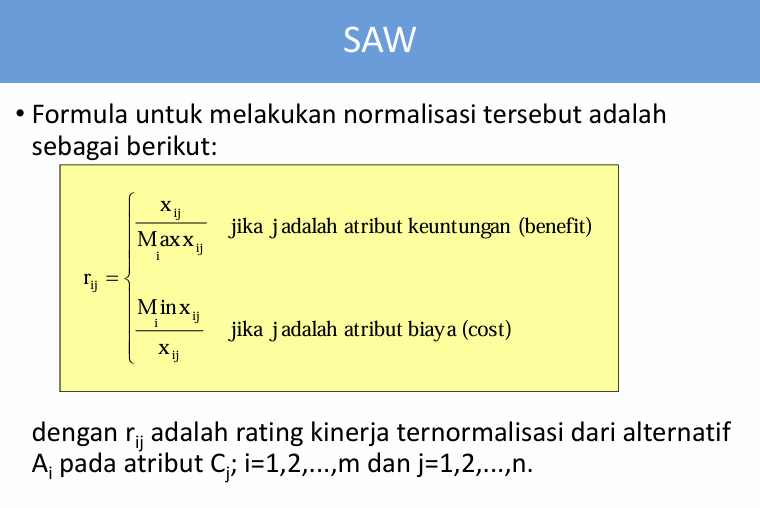

In [10]:
# --- LANGKAH 3: NORMALISASI MATRIKS (R) ---
# Normalisasi matriks keputusan berdasarkan tipe kriteria

# Buat DataFrame dari data asli
matriks_keputusan = pd.DataFrame(data, index=alternatif)

R = matriks_keputusan.copy()
for kriteria in matriks_keputusan.columns:
    if tipe_kriteria[kriteria] == 'benefit':
        R[kriteria] = matriks_keputusan[kriteria] / matriks_keputusan[kriteria].max()
    elif tipe_kriteria[kriteria] == 'cost':
        R[kriteria] = matriks_keputusan[kriteria].min() / matriks_keputusan[kriteria]
R

,Kecepatan Clock (MHz),Kapasitas RAM (KB),Kapasitas Flash Memory (KB),Arsitektur CPU (bit),Jumlah Pin GPIO,Resolusi ADC (bit),Ketersediaan FPU,Jumlah Antarmuka UART,Jumlah Antarmuka I2C,Jumlah Antarmuka SPI,Ketersediaan Wi-Fi (built-in),Ketersediaan Bluetooth/BLE,Dukungan Ethernet,Dukungan Protokol IoT (MQTT),Konsumsi Daya Aktif (mA),Konsumsi Daya Deep Sleep (µA),Tegangan Operasi (Volt),Harga per Unit (Rupiah),Harga per 1000 Unit (Rupiah),Ketersediaan di Pemasok Lokal,Waktu Tunggu (Lead Time),Dukungan Arduino IDE,Dukungan PlatformIO,Kualitas Dokumentasi Resmi,Ukuran Komunitas Online,Jumlah Library Tersedia,Kemudahan Penggunaan,Ukuran Fisik/Form Factor (mm²),Toleransi Suhu Operasional (°C),Fitur Keamanan Hardware
ESP32-WROOM-32,0.400000,0.507812,0.500,1.00,0.666667,1.000000,1.0,0.375,0.50,1.00,1.0,1.0,1.0,1.0,0.157895,0.100000,1.00,0.294118,0.272727,1.0,1.000000,1.0,1.0,0.8,1.0,1.0,0.8,0.160000,0.68,1.0
NodeMCU ESP8266,0.133333,0.078125,0.500,1.00,0.333333,0.833333,0.0,0.250,0.25,0.50,1.0,0.0,0.0,0.8,0.214286,0.050000,1.00,0.555556,0.535714,1.0,1.000000,1.0,1.0,0.6,1.0,0.8,0.8,0.133333,0.68,0.0
Arduino Uno R3,0.026667,0.001953,0.004,0.25,0.392157,0.833333,0.0,0.125,0.25,0.25,0.0,0.0,0.0,0.4,0.333333,0.020000,0.66,0.208333,0.166667,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,0.054466,0.68,0.0
Raspberry Pi Pico W,0.221667,0.257812,0.250,1.00,0.588235,1.000000,1.0,0.250,0.50,0.50,1.0,1.0,0.0,0.8,0.166667,0.005556,1.00,0.227273,0.187500,0.8,0.500000,1.0,1.0,1.0,0.8,0.8,0.8,0.163399,0.68,1.0
STM32 Nucleo-64,0.140000,0.125000,0.064,1.00,1.000000,1.000000,1.0,0.500,0.50,0.75,0.0,0.0,1.0,0.6,0.300000,0.100000,1.00,0.113636,0.100000,0.6,0.250000,1.0,1.0,0.8,0.8,0.8,0.6,0.042699,0.68,1.0
Teensy 4.1,1.000000,1.000000,1.000,1.00,0.784314,0.833333,1.0,1.000,1.00,0.75,0.0,0.0,1.0,0.6,0.150000,0.007692,1.00,0.055556,0.039474,0.4,0.166667,1.0,1.0,0.8,0.8,0.8,0.6,0.079365,0.68,1.0
Seeed Studio XIAO ESP32C3,0.266667,0.390625,0.500,1.00,0.215686,1.000000,1.0,0.250,0.25,0.25,1.0,1.0,0.0,0.8,0.187500,0.200000,1.00,0.357143,0.333333,0.8,0.500000,1.0,1.0,0.8,0.6,0.6,0.8,0.519481,0.68,1.0
Nordic nRF52840 DK,0.106667,0.250000,0.128,1.00,0.941176,1.000000,1.0,0.250,0.50,0.75,0.0,1.0,0.0,0.8,1.000000,0.500000,1.00,0.041667,0.033333,0.2,0.125000,1.0,1.0,1.0,0.8,0.8,0.6,0.025000,0.68,1.0
Particle Argon,0.106667,0.125000,0.064,1.00,0.392157,1.000000,1.0,0.250,0.75,0.50,1.0,1.0,0.0,1.0,0.187500,0.012500,1.00,0.045455,0.037500,0.2,0.125000,1.0,1.0,1.0,0.6,1.0,1.0,0.098425,0.68,1.0
Adafruit Feather HUZZAH32,0.400000,0.507812,0.500,1.00,0.411765,1.000000,1.0,0.375,0.50,0.50,1.0,1.0,0.0,1.0,0.157895,0.066667,1.00,0.100000,0.083333,0.6,0.250000,1.0,1.0,1.0,1.0,1.0,1.0,0.173913,0.68,1.0


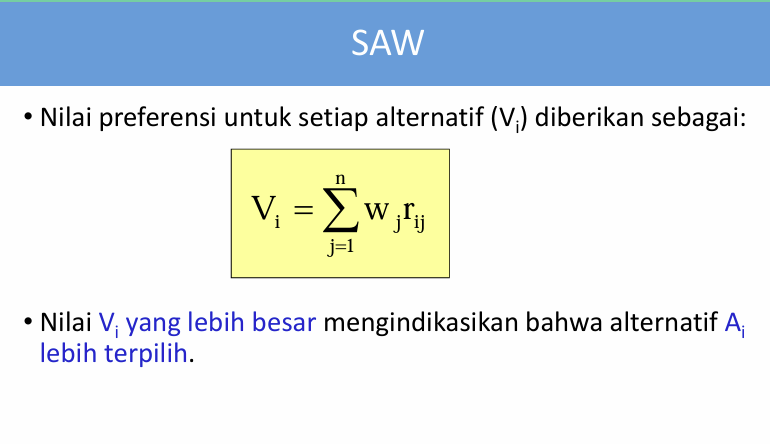

In [13]:
# --- LANGKAH 4: MENGHITUNG SKOR PREFERENSI (V) DAN PERANKINGAN ---
V = pd.Series(index=R.index, dtype='float64')
for alt in R.index:
    skor = 0
    for krit in R.columns:
        skor += bobot[krit] * R.loc[alt, krit]
    V[alt] = skor

# Buat DataFrame hasil akhir
hasil_akhir = pd.DataFrame({
    'Skor_SAW': V,
    'Ranking': V.rank(ascending=False).astype(int)
}).sort_values(by='Ranking')
hasil_akhir

,Skor_SAW,Ranking
ESP32-WROOM-32,0.654046,1
Seeed Studio XIAO ESP32C3,0.585426,2
NodeMCU ESP8266,0.556588,3
Adafruit Feather HUZZAH32,0.553154,4
Raspberry Pi Pico W,0.548013,5
Particle Argon,0.480762,6
AVR ATmega328P (Chip),0.478715,7
PIC18F45K22 (Chip),0.457868,8
Nordic nRF52840 DK,0.429114,9
Teensy 4.1,0.366051,10
